In [1]:
import numpy as np
import matplotlib.pyplot as plt

Q_hat_block = np.load("Q_hat/y_velocity/Q_hat_block01.npy")  # Cargar datos

print(Q_hat_block.shape)

(512, 1200, 331)


In [ ]:
# Calcular potencia promedio por frecuencia (|FFT|²)
power_spectrum = np.mean(np.abs(Q_hat_block)**2, axis=(0,1))

plt.figure()
plt.plot(power_spectrum)
plt.xlabel('Índice de frecuencia (k)')
plt.ylabel('Potencia promedio')
plt.title('Espectro de potencia del bloque')
plt.show()

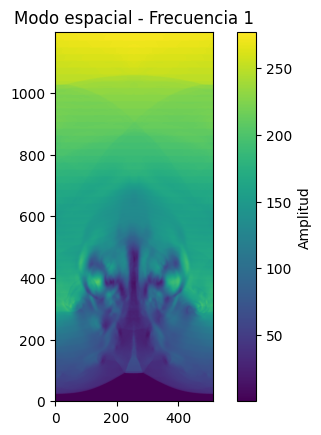

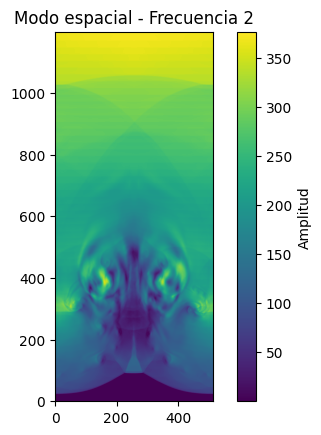

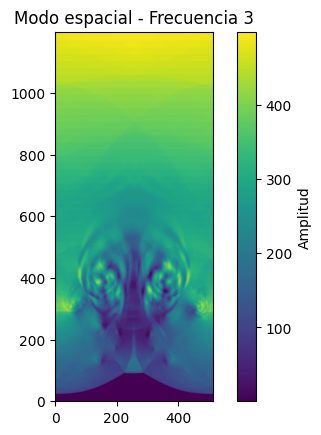

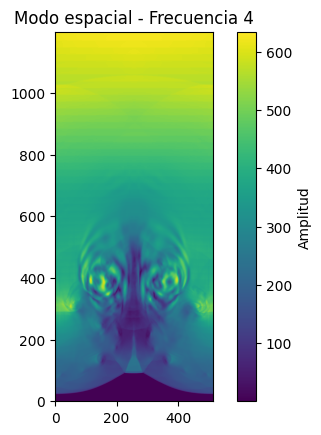

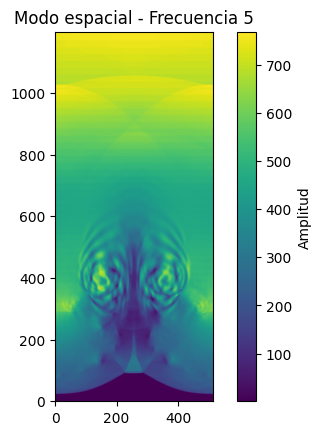

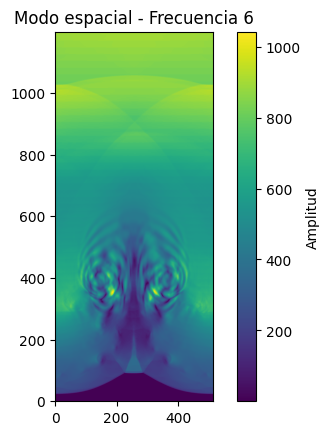

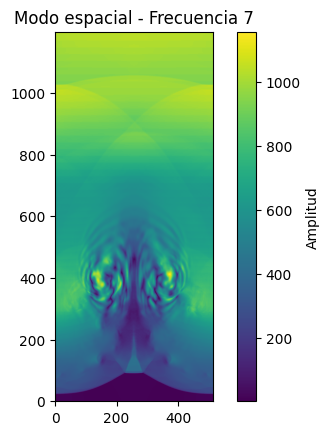

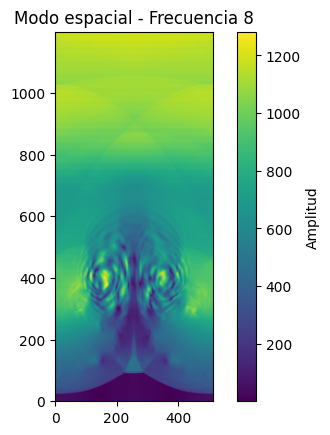

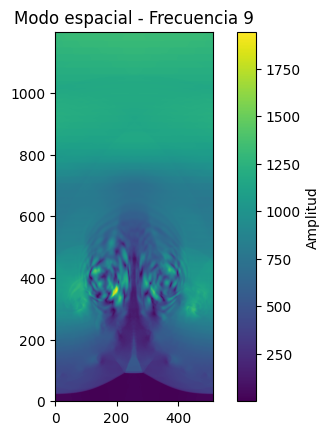

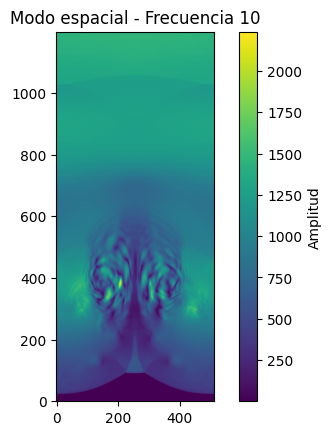

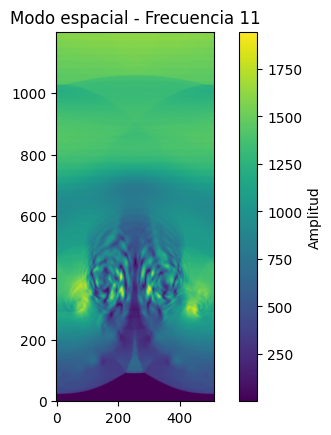

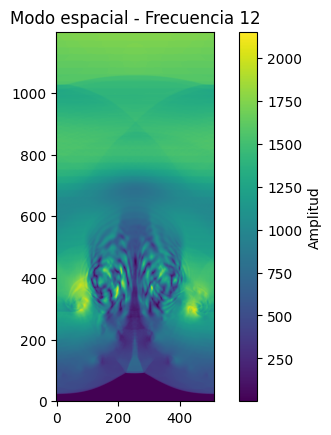

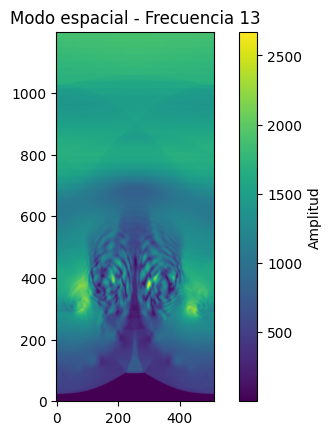

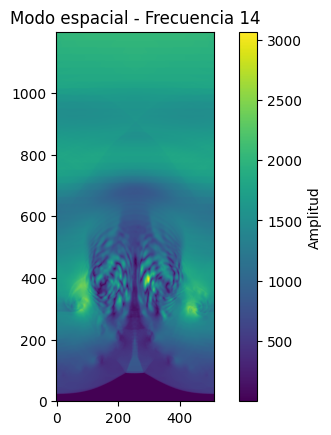

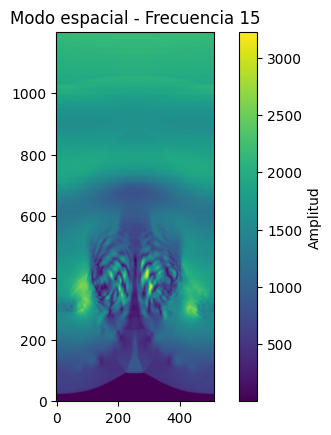

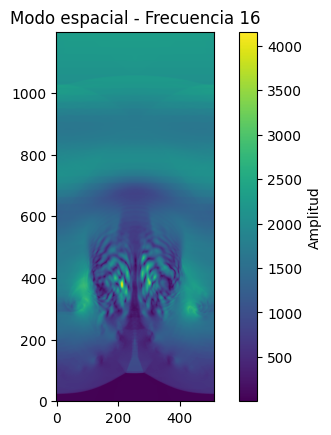

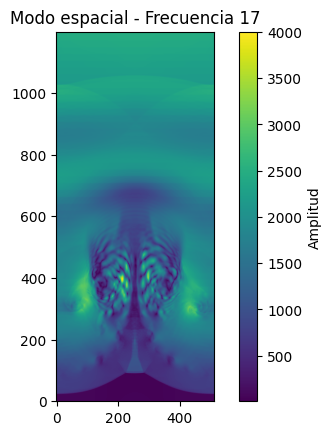

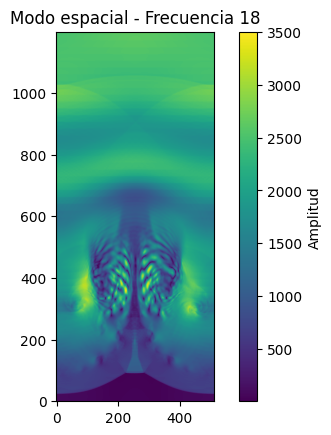

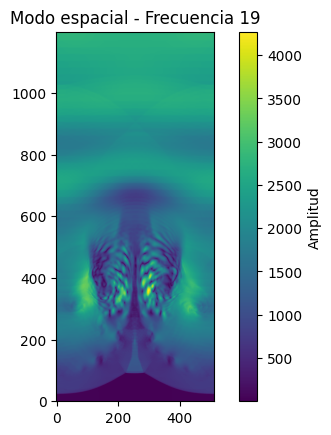

In [8]:
for i in range(1,20):
    freq_idx = i  # Índice de frecuencia a visualizar

    # Amplitud (módulo) para la frecuencia seleccionada
    mode_amplitude = np.abs(Q_hat_block[:, :, freq_idx])
    
    plt.figure()
    plt.imshow(mode_amplitude.T, origin='lower', cmap='viridis')
    plt.colorbar(label='Amplitud')
    plt.title(f'Modo espacial - Frecuencia {freq_idx}')
    plt.show()

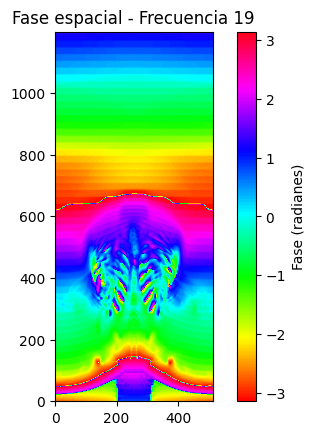

In [9]:
mode_phase = np.angle(Q_hat_block[:, :, freq_idx])

plt.figure()
plt.imshow(mode_phase.T, origin='lower', cmap='hsv')
plt.colorbar(label='Fase (radianes)')
plt.title(f'Fase espacial - Frecuencia {freq_idx}')
plt.show()

In [26]:
dt = 5e-8  # Intervalo de tiempo entre snapshots
n_snapshots_per_block=3
frequencies = np.fft.rfftfreq(n_snapshots_per_block, d=dt)

print(f"Frecuencia {freq_idx}: {frequencies[freq_idx]} Hz")

IndexError: index 200 is out of bounds for axis 0 with size 2

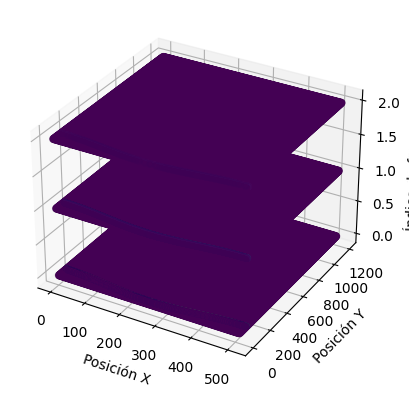

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Crear grid espacial y de frecuencias
x = np.arange(Q_hat_block.shape[0])
y = np.arange(Q_hat_block.shape[1])
f = np.arange(Q_hat_block.shape[2])
X, Y, F = np.meshgrid(x, y, f, indexing='ij')

# Graficar amplitud en 3D (puede ser pesado para datos grandes)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, F, c=np.abs(Q_hat_block).flatten(), alpha=0.1)
ax.set_xlabel('Posición X')
ax.set_ylabel('Posición Y')
ax.set_zlabel('Índice de frecuencia')
plt.show()